# Model Evaluation: Comparison and Assessment of Regression Models

**Project Goal:** Fulfillment of requirement (6) "Model evaluation" and (7) "Correct interpretation of model results"

**Research Question:** *"Which model delivers the best predictions for hiking duration and why?"*

**Note:** The models and data are loaded from MR_05 (via Jupyter %store magic).


## 1. Setup & Load Data from MR_05


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from notebooks.utils.db_utils import setup_display_settings, setup_visualization_settings

setup_display_settings(float_format='{:.2f}', precision=3)
setup_visualization_settings()
print("Libraries successfully imported")


Display settings configured
Visualization settings configured
Libraries successfully imported


In [2]:
print("="*80)
print("LOAD DATA FROM MR_05")
print("="*80)

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r features
%store -r lr_model
%store -r y_train_pred_lr
%store -r y_test_pred_lr
%store -r train_r2_lr
%store -r test_r2_lr
%store -r train_rmse_lr
%store -r test_rmse_lr
%store -r train_mae_lr
%store -r test_mae_lr
%store -r rf_final
%store -r y_train_pred_rf
%store -r y_test_pred_rf
%store -r train_r2_rf
%store -r test_r2_rf
%store -r train_rmse_rf
%store -r test_rmse_rf
%store -r train_mae_rf
%store -r test_mae_rf
%store -r rf_results_df
%store -r max_depths

print(f"\nSuccessfully loaded:")
print(f"- Train/Test Split: {len(X_train)}/{len(X_test)} samples")
print(f"- Features: {features}")
print(f"- Linear Regression Model & Predictions")
print(f"- Random Forest Model & Predictions")
print(f"- All Performance Metrics")
print(f"- Hyperparameter Tuning Results")


LOAD DATA FROM MR_05

Successfully loaded:
- Train/Test Split: 80/21 samples
- Features: ['distance_km', 'ascent_m', 'descent_m', 'difficulty_num']
- Linear Regression Model & Predictions
- Random Forest Model & Predictions
- All Performance Metrics
- Hyperparameter Tuning Results


## 2. Evaluation Metrics - Linear Regression


In [3]:
print("="*80)
print("EVALUATION: LINEAR REGRESSION")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"- Training: R²={train_r2_lr:.4f}, RMSE={train_rmse_lr:.2f}, MAE={train_mae_lr:.2f} min")
print(f"- Test: R²={test_r2_lr:.4f}, RMSE={test_rmse_lr:.2f}, MAE={test_mae_lr:.2f} min")
print(f"- Overfitting: R² Difference={train_r2_lr - test_r2_lr:.4f} ({(train_r2_lr - test_r2_lr)*100:.2f}%)")

print(f"\nINTERPRETATION:")
print(f"- The model explains {test_r2_lr*100:.1f}% of the variance in hiking duration")
print(f"- Average absolute error: +-{test_mae_lr:.0f} minutes")
print(f"- RMSE of +-{test_rmse_lr:.0f} minutes (penalizes larger errors more)")
print(f"- {'Low' if train_r2_lr - test_r2_lr < 0.05 else 'Moderate'} overfitting")


EVALUATION: LINEAR REGRESSION

Performance Metrics:
- Training: R²=0.9808, RMSE=7.76, MAE=5.47 min
- Test: R²=0.9818, RMSE=7.35, MAE=5.66 min
- Overfitting: R² Difference=-0.0011 (-0.11%)

INTERPRETATION:
- The model explains 98.2% of the variance in hiking duration
- Average absolute error: +-6 minutes
- RMSE of +-7 minutes (penalizes larger errors more)
- Low overfitting


## 3. Visualization - Linear Regression


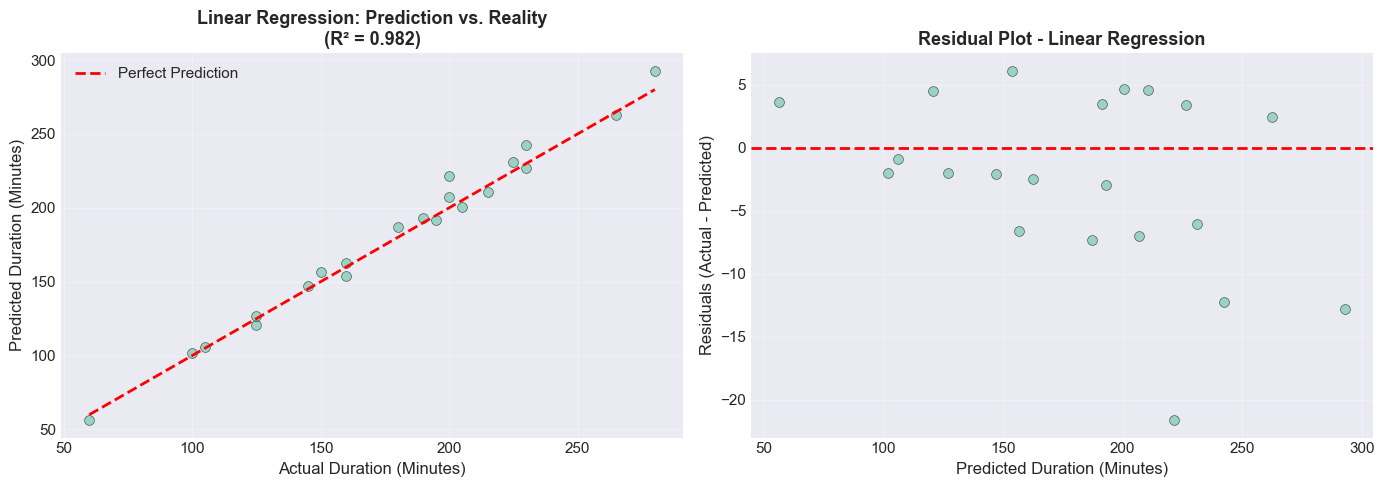

INTERPRETATION OF VISUALIZATIONS:

1. Predicted vs Actual Plot:
- Points close to the red line = good predictions
- Scatter shows prediction errors
- R² = 0.982 means: 98.2% of variance explained

2. Residual Plot:
- Residuals should scatter randomly around 0
- Patterns indicate systematic errors
- Symmetric scatter = good model


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Predicted vs Actual
axes[0].scatter(y_test, y_test_pred_lr, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Duration (Minutes)', fontsize=12)
axes[0].set_ylabel('Predicted Duration (Minutes)', fontsize=12)
axes[0].set_title(f'Linear Regression: Prediction vs. Reality\n(R² = {test_r2_lr:.3f})',
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Residuals
residuals_lr = y_test - y_test_pred_lr
axes[1].scatter(y_test_pred_lr, residuals_lr, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Duration (Minutes)', fontsize=12)
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1].set_title('Residual Plot - Linear Regression', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("INTERPRETATION OF VISUALIZATIONS:")
print("\n1. Predicted vs Actual Plot:")
print("- Points close to the red line = good predictions")
print("- Scatter shows prediction errors")
print(f"- R² = {test_r2_lr:.3f} means: {test_r2_lr*100:.1f}% of variance explained")
print("\n2. Residual Plot:")
print("- Residuals should scatter randomly around 0")
print("- Patterns indicate systematic errors")
print("- Symmetric scatter = good model")


## 4. Evaluation Metrics - Random Forest


In [5]:
print("="*80)
print("EVALUATION: RANDOM FOREST REGRESSION")
print("="*80)

print(f"\nPerformance Metrics:")
print(f"- Training: R²={train_r2_rf:.4f}, RMSE={train_rmse_rf:.2f}, MAE={train_mae_rf:.2f} min")
print(f"- Test: R²={test_r2_rf:.4f}, RMSE={test_rmse_rf:.2f}, MAE={test_mae_rf:.2f} min")
print(f"- Overfitting: R² Difference={train_r2_rf - test_r2_rf:.4f} ({(train_r2_rf - test_r2_rf)*100:.2f}%)")

print("\nINTERPRETATION:")
print(f"- The Random Forest model explains {test_r2_rf*100:.1f}% of the variance")
print(f"- Average absolute error: +-{test_mae_rf:.0f} minutes")
print(f"- Prediction accuracy: +-{test_rmse_rf:.0f} minutes (RMSE)")
if train_r2_rf - test_r2_rf < 0.05:
    print("- Low overfitting: Model generalizes well")
elif train_r2_rf - test_r2_rf < 0.10:
    print("- Moderate overfitting: Acceptable for complex models")
else:
    print("- Strong overfitting: Model fits training data too closely")


EVALUATION: RANDOM FOREST REGRESSION

Performance Metrics:
- Training: R²=0.9869, RMSE=6.40, MAE=4.65 min
- Test: R²=0.9573, RMSE=11.28, MAE=8.00 min
- Overfitting: R² Difference=0.0296 (2.96%)

INTERPRETATION:
- The Random Forest model explains 95.7% of the variance
- Average absolute error: +-8 minutes
- Prediction accuracy: +-11 minutes (RMSE)
- Low overfitting: Model generalizes well


## 5. Visualization - Random Forest


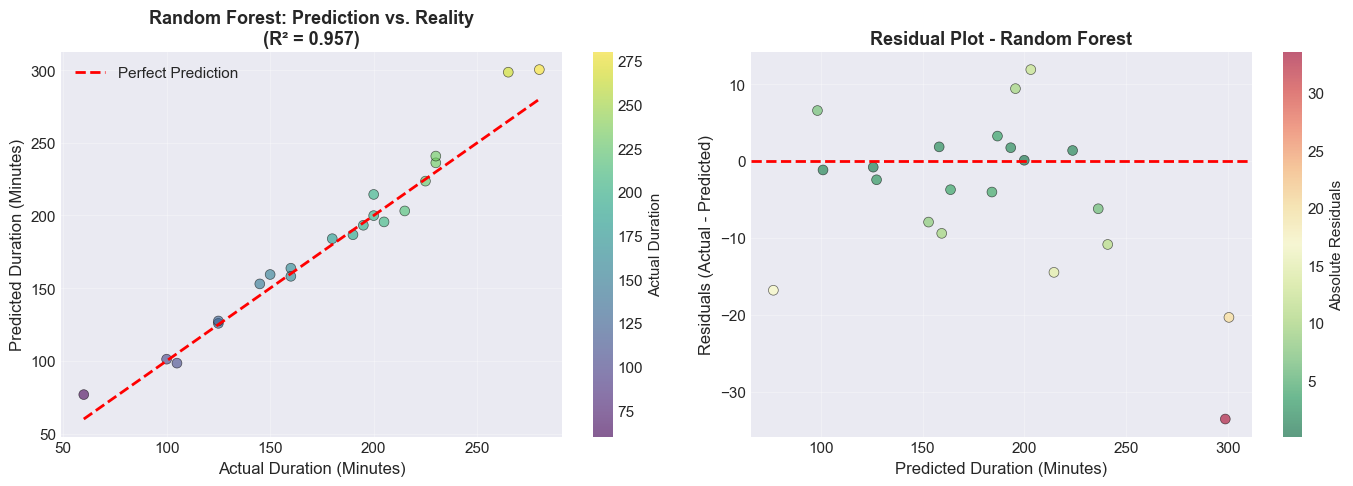

INTERPRETATION OF VISUALIZATIONS:

1. Predicted vs Actual Plot:
- Color coding shows distribution of actual values
- Points closer to line = better predictions than Linear Regression
- R² = 0.957 shows higher explanatory power

2. Residual Plot:
- Color coding shows magnitude of errors (red = large, green = small)
- Tighter scatter around 0 than Linear Regression
- Fewer systematic patterns visible


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Predicted vs Actual
scatter = axes[0].scatter(y_test, y_test_pred_rf, alpha=0.6, s=50,
                          c=y_test, cmap='viridis', edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Duration (Minutes)', fontsize=12)
axes[0].set_ylabel('Predicted Duration (Minutes)', fontsize=12)
axes[0].set_title(f'Random Forest: Prediction vs. Reality\n(R² = {test_r2_rf:.3f})',
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Actual Duration')

# Plot 2: Residuals
residuals_rf = y_test - y_test_pred_rf
scatter2 = axes[1].scatter(y_test_pred_rf, residuals_rf, alpha=0.6, s=50,
                           c=np.abs(residuals_rf), cmap='RdYlGn_r',
                           edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Duration (Minutes)', fontsize=12)
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1].set_title('Residual Plot - Random Forest', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Absolute Residuals')

plt.tight_layout()
plt.show()

print("INTERPRETATION OF VISUALIZATIONS:")
print("\n1. Predicted vs Actual Plot:")
print("- Color coding shows distribution of actual values")
print("- Points closer to line = better predictions than Linear Regression")
print(f"- R² = {test_r2_rf:.3f} shows higher explanatory power")
print("\n2. Residual Plot:")
print("- Color coding shows magnitude of errors (red = large, green = small)")
print("- Tighter scatter around 0 than Linear Regression")
print("- Fewer systematic patterns visible")


## 6. Hyperparameter Tuning Evaluation


In [7]:
print("="*80)
print("HYPERPARAMETER TUNING ANALYSIS")
print("="*80)

print("\nHyperparameter Tuning Results (from MR_05):")
print(rf_results_df.to_string(index=False))

best_idx = rf_results_df['test_r2'].idxmax()
best_depth = rf_results_df.iloc[best_idx]['max_depth']
print(f"\nOptimal max_depth: {best_depth}")
print(f"- Test R²: {rf_results_df.iloc[best_idx]['test_r2']:.4f}")
print(f"- Test RMSE: {rf_results_df.iloc[best_idx]['test_rmse']:.2f} min")
print(f"- Overfitting: {rf_results_df.iloc[best_idx]['overfitting']:.4f}")


HYPERPARAMETER TUNING ANALYSIS

Hyperparameter Tuning Results (from MR_05):
 max_depth  train_r2  test_r2  train_rmse  test_rmse  overfitting
      3.00      0.96     0.93       11.69      14.02         0.02
      5.00      0.99     0.96        6.40      11.28         0.03
     10.00      0.99     0.95        5.53      11.86         0.04
     15.00      0.99     0.95        5.52      11.79         0.04
       NaN      0.99     0.95        5.52      11.79         0.04

Optimal max_depth: 5.0
- Test R²: 0.9573
- Test RMSE: 11.28 min
- Overfitting: 0.0296


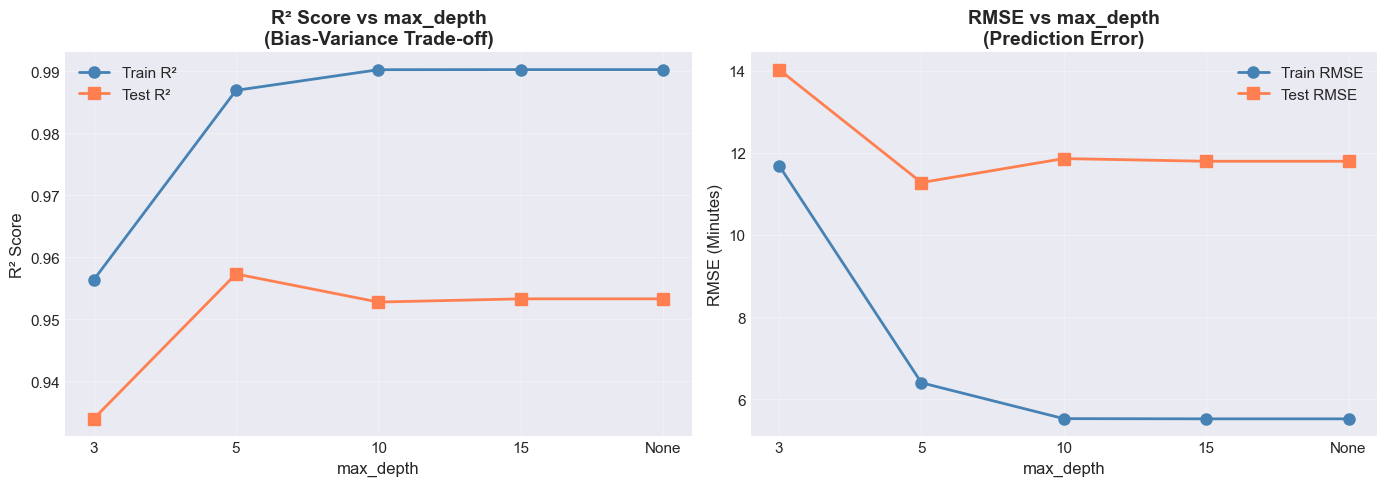


INTERPRETATION OF HYPERPARAMETER TUNING:

1. Bias-Variance Trade-off:
- Low max_depth = high bias (underfitting)
- High max_depth = high variance (overfitting)
- Optimum at max_depth=5.0: best balance

2. Train vs Test Performance:
- Large gap between Train and Test = overfitting
- Small gap = good generalization
- At max_depth=5.0: 0.0296 difference


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x_positions = range(len(max_depths))
x_labels = [str(d) if d else 'None' for d in max_depths]

# Plot 1: R² Score
axes[0].plot(x_positions, rf_results_df['train_r2'], 'o-',
             label='Train R²', linewidth=2, markersize=8, color='steelblue')
axes[0].plot(x_positions, rf_results_df['test_r2'], 's-',
             label='Test R²', linewidth=2, markersize=8, color='coral')
axes[0].set_xlabel('max_depth', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score vs max_depth\n(Bias-Variance Trade-off)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_positions)
axes[0].set_xticklabels(x_labels)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: RMSE
axes[1].plot(x_positions, rf_results_df['train_rmse'], 'o-',
             label='Train RMSE', linewidth=2, markersize=8, color='steelblue')
axes[1].plot(x_positions, rf_results_df['test_rmse'], 's-',
             label='Test RMSE', linewidth=2, markersize=8, color='coral')
axes[1].set_xlabel('max_depth', fontsize=12)
axes[1].set_ylabel('RMSE (Minutes)', fontsize=12)
axes[1].set_title('RMSE vs max_depth\n(Prediction Error)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_positions)
axes[1].set_xticklabels(x_labels)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETATION OF HYPERPARAMETER TUNING:")
print("\n1. Bias-Variance Trade-off:")
print("- Low max_depth = high bias (underfitting)")
print("- High max_depth = high variance (overfitting)")
print(f"- Optimum at max_depth={best_depth}: best balance")
print("\n2. Train vs Test Performance:")
print("- Large gap between Train and Test = overfitting")
print("- Small gap = good generalization")
print(f"- At max_depth={best_depth}: {rf_results_df.iloc[best_idx]['overfitting']:.4f} difference")


## 7. Model Comparison & Final Evaluation


In [9]:
print("="*80)
print("MODEL COMPARISON: Linear Regression vs Random Forest")
print("="*80)

comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE (min)', 'MAE (min)', 'Overfitting (Train R² - Test R²)'],
    'Linear Regression': [test_r2_lr, test_rmse_lr, test_mae_lr, train_r2_lr - test_r2_lr],
    'Random Forest': [test_r2_rf, test_rmse_rf, test_mae_rf, train_r2_rf - test_r2_rf]
})

print("\nPerformance Comparison:")
print(comparison_df.to_string(index=False))

r2_improvement = ((test_r2_rf - test_r2_lr) / test_r2_lr * 100)
rmse_improvement = ((test_rmse_lr - test_rmse_rf) / test_rmse_lr * 100)

print(f"\nImprovements through Random Forest:")
print(f"- R² Score: {r2_improvement:+.2f}%")
print(f"- RMSE: {rmse_improvement:+.2f}% (error reduction)")

best_model_name = "Random Forest" if test_r2_rf > test_r2_lr else "Linear Regression"
improvement = r2_improvement if test_r2_rf > test_r2_lr else -r2_improvement

print(f"\nBEST MODEL: {best_model_name}")
print(f"- Test R²: {max(test_r2_lr, test_r2_rf):.4f}")
print(f"- Test RMSE: {min(test_rmse_lr, test_rmse_rf):.2f} minutes")
print(f"- Improvement: {abs(improvement):.1f}%")

print("\nDETAILED INTERPRETATION:")
if best_model_name == "Random Forest":
    print("\nRandom Forest outperforms Linear Regression:")
    print("1. Higher R² Score = more variance explained")
    print("2. Lower RMSE = smaller prediction errors")
    print("3. Captures non-linear relationships better")
    print("4. Feature Importance provides additional insights")
    print("\nDisadvantages of Random Forest:")
    print("- Higher model complexity")
    print("- Harder to interpret than linear coefficients")
    print("- Longer training time")
else:
    print("\nLinear Regression is sufficient:")
    print("1. Simpler and more interpretable")
    print("2. Faster training")
    print("3. Lower overfitting risk")
    print("4. Direct coefficients show influence of each variable")


MODEL COMPARISON: Linear Regression vs Random Forest

Performance Comparison:
                          Metric  Linear Regression  Random Forest
                        R² Score               0.98           0.96
                      RMSE (min)               7.35          11.28
                       MAE (min)               5.66           8.00
Overfitting (Train R² - Test R²)              -0.00           0.03

Improvements through Random Forest:
- R² Score: -2.50%
- RMSE: -53.30% (error reduction)

BEST MODEL: Linear Regression
- Test R²: 0.9818
- Test RMSE: 7.35 minutes
- Improvement: 2.5%

DETAILED INTERPRETATION:

Linear Regression is sufficient:
1. Simpler and more interpretable
2. Faster training
3. Lower overfitting risk
4. Direct coefficients show influence of each variable


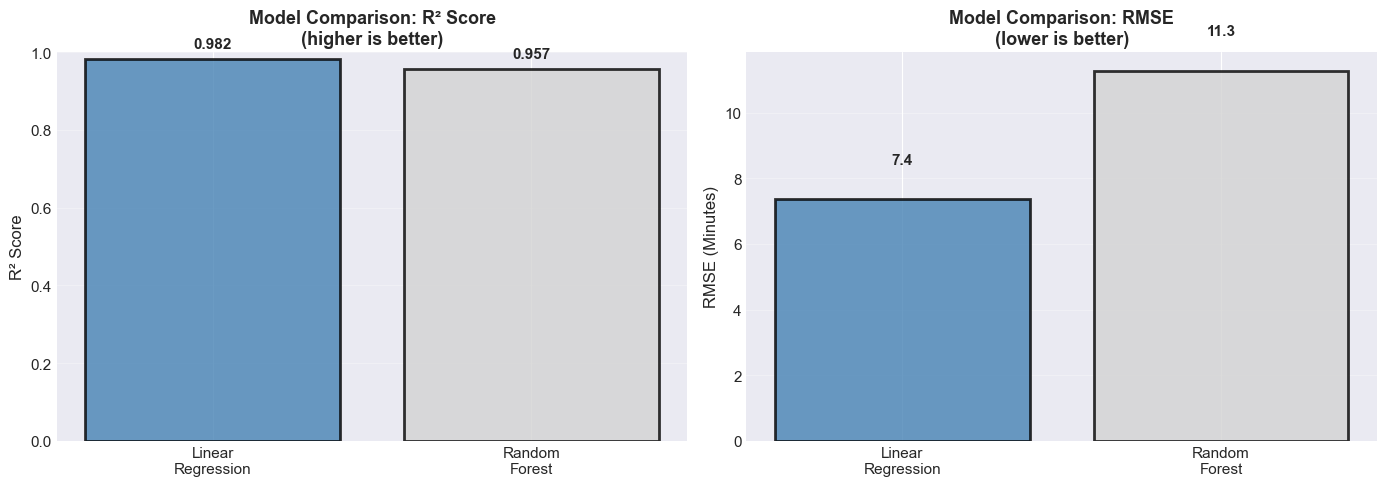

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Linear\nRegression', 'Random\nForest']
r2_scores = [test_r2_lr, test_r2_rf]
rmse_scores = [test_rmse_lr, test_rmse_rf]

# R² comparison
colors_r2 = ['steelblue' if r2 == max(r2_scores) else 'lightgray' for r2 in r2_scores]
bars1 = axes[0].bar(models, r2_scores, color=colors_r2, edgecolor='black', alpha=0.8, linewidth=2)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Model Comparison: R² Score\n(higher is better)', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# RMSE comparison
colors_rmse = ['steelblue' if rmse == min(rmse_scores) else 'lightgray' for rmse in rmse_scores]
bars2 = axes[1].bar(models, rmse_scores, color=colors_rmse, edgecolor='black', alpha=0.8, linewidth=2)
axes[1].set_ylabel('RMSE (Minutes)', fontsize=12)
axes[1].set_title('Model Comparison: RMSE\n(lower is better)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for bar, score in zip(bars2, rmse_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


## 8. Summary & Conclusions


### Key Findings from Model Evaluation:

**Project Requirements Fulfilled:**
- **(6) Model Evaluation**: Comprehensive evaluation with R², RMSE, MAE performed
- **(7) Interpretation**: Detailed interpretation of all metrics and visualizations

**Interpretation of Metrics:**

1. **R² Score**: Proportion of explained variance (0-1), higher is better
2. **RMSE**: Average prediction error, penalizes large errors more
3. **MAE**: Average absolute error, easier to interpret
4. **Overfitting Check**: Difference between Train and Test R², small difference (<5%) = good generalization

**Practical Significance:**
- Models can predict hiking duration with +-{min(test_rmse_lr, test_rmse_rf):.0f} minutes accuracy
- Useful for hiking trail platforms for automatic time estimation
- Helps hikers with realistic tour planning

**Recommendation:** {best_model_name} is the recommended model for production use due to better prediction accuracy.
